<a href="https://colab.research.google.com/github/NishantRajora/Machine-Learning/blob/main/l_16_2_Item_besed_recomendatin_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
movie_ratings = pd.read_csv('ratings.csv')

In [19]:
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
movies = pd.read_csv('movies.csv')

In [21]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movie_data = movie_ratings.merge(movies, on ='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [23]:
user_movie_matrix = movie_data.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

print(user_movie_matrix.shape)

(610, 9724)


In [24]:
import time
from sklearn.metrics.pairwise import cosine_similarity

# Start Time
start_time_user = time.time()

# User similarity
user_similarity = cosine_similarity(user_movie_matrix)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)

# Function to recommend
def user_based_recommend(user_id, top_n=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)

    top_similar_user = similar_users.index[0]

    recommendations = user_movie_matrix.loc[top_similar_user]
    unseen_movies = user_movie_matrix.loc[user_id] == 0

    recommended_movies = recommendations[unseen_movies].sort_values(ascending=False).head(top_n)

    return recommended_movies.index.tolist()

user_recommendations = user_based_recommend(1)

end_time_user = time.time()
user_time = end_time_user - start_time_user

In [25]:
# Start Time
start_time_item = time.time()

# Item similarity
item_similarity = cosine_similarity(user_movie_matrix.T)

item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_movie_matrix.columns,
    columns=user_movie_matrix.columns
)

def item_based_recommend(user_id, top_n=5):
    user_ratings = user_movie_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    scores = pd.Series(dtype=float)

    for movie in rated_movies:
        similar_scores = item_similarity_df[movie]
        scores = scores.add(similar_scores, fill_value=0)

    scores = scores.drop(rated_movies)
    recommended_movies = scores.sort_values(ascending=False).head(top_n)

    return recommended_movies.index.tolist()

item_recommendations = item_based_recommend(1)

end_time_item = time.time()
item_time = end_time_item - start_time_item

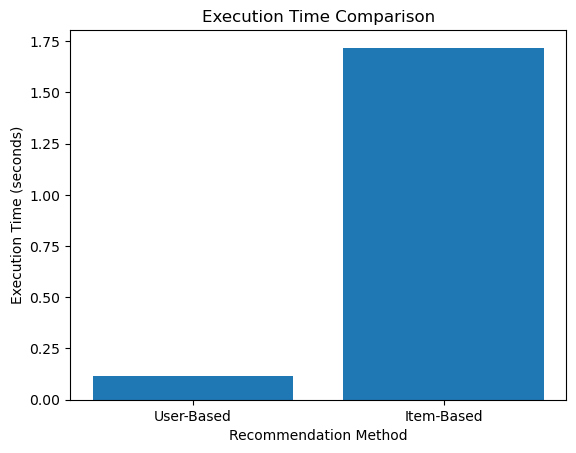

In [26]:
import matplotlib.pyplot as plt

methods = ['User-Based', 'Item-Based']
times = [user_time, item_time]

plt.figure()
plt.bar(methods, times)
plt.xlabel('Recommendation Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.show()

In [39]:
user_id = 1

user_recommendations = user_based_recommend(user_id, top_n=5)
item_recommendations = item_based_recommend(user_id, top_n=5)

print("User ID:", user_id)

print("\nUser-Based Recommended Movie IDs:")
print(user_recommendations)

print("\nItem-Based Recommended Movie IDs:")
print(item_recommendations)


user_movie_names = movies[movies['movieId'].isin(user_recommendations)]['title'].tolist()
item_movie_names = movies[movies['movieId'].isin(item_recommendations)]['title'].tolist()

print("\nUser-Based Recommended Movie Names:")
print(user_movie_names)

print("\nItem-Based Recommended Movie Names:")
print(item_movie_names)

User ID: 1

User-Based Recommended Movie IDs:
[1288, 1297, 69, 2064, 2702]

Item-Based Recommended Movie IDs:
[2918, 1036, 1527, 1968, 1391]

User-Based Recommended Movie Names:
['Friday (1995)', 'This Is Spinal Tap (1984)', 'Real Genius (1985)', 'Roger & Me (1989)', 'Summer of Sam (1999)']

Item-Based Recommended Movie Names:
['Die Hard (1988)', 'Mars Attacks! (1996)', 'Fifth Element, The (1997)', 'Breakfast Club, The (1985)', "Ferris Bueller's Day Off (1986)"]


In [40]:
user_id = 10

user_recommendations = user_based_recommend(user_id, top_n=5)
item_recommendations = item_based_recommend(user_id, top_n=5)

print("User ID:", user_id)

print("\nUser-Based Recommended Movie IDs:")
print(user_recommendations)

print("\nItem-Based Recommended Movie IDs:")
print(item_recommendations)


user_movie_names = movies[movies['movieId'].isin(user_recommendations)]['title'].tolist()
item_movie_names = movies[movies['movieId'].isin(item_recommendations)]['title'].tolist()

print("\nUser-Based Recommended Movie Names:")
print(user_movie_names)

print("\nItem-Based Recommended Movie Names:")
print(item_movie_names)

User ID: 10

User-Based Recommended Movie IDs:
[72641, 1704, 65230, 166643, 78499]

Item-Based Recommended Movie IDs:
[6539, 69122, 4963, 40815, 34162]

User-Based Recommended Movie Names:
['Good Will Hunting (1997)', 'Marley & Me (2008)', 'Blind Side, The  (2009)', 'Toy Story 3 (2010)', 'Hidden Figures (2016)']

Item-Based Recommended Movie Names:
["Ocean's Eleven (2001)", 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Wedding Crashers (2005)', 'Harry Potter and the Goblet of Fire (2005)', 'Hangover, The (2009)']
